# Introduction

This lab is from the "Introduction to Statistical Learning" textbook. 
The labs typically cover hwo to implement different statistical learning models, diagnostics, etc.
However, for this first one, I'll be using as a quick review on the Python scientific computing stack tools I'm already familiar with. 

---

## Introduction to Numerical Python

This section brushes up on some basic functionality of `numpy`. 

In [1]:
import numpy as np

In [2]:
# create some numpy arrays with Python lists
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])

In [3]:
# basic vectorized arithmetic with numpy 
x + y 

array([ 7, 13, 12])

With `numpy`, matrices are represented as two-dimensional arrays and vectors as one-dimensional arrays. 
It should be noted that we can use `numpy`'s built-in `numpy.matrix()` function to create matrices, but we'll stick to 
creating matrices with `numpy` arrays.

In [4]:
# multidimensional arrays using a Python list of Python lists 
x = np.array([
    [1, 2],
    [3, 4]
])

x

array([[1, 2],
       [3, 4]])

In [5]:
# get the number of dimensions for a given array
x.ndim

2

In [6]:
# what data type are the matrix elements?...
x.dtype

dtype('int64')

In [7]:
# different data type
np.array([
    [1.0, 2],
    [3, 4.0]
]).dtype

dtype('float64')

In [8]:
# display any existing documentation
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if ``__array__`` returns a copy, if obj is a nested
    sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly crea

In [9]:
# create an array with a specified data type
np.array([
    [1, 2], 
    [3, 4]],
    float
).dtype

dtype('float64')

In [10]:
# return the number of rows and columns (more for more dimensions)
x.shape

(2, 2)

`numpy` arrays have built-in methods allowing for operations on the elements of the array but 
there are also built-in functions that may or may not perform the same operation.

In [11]:
# sum using method
x = np.array([1, 2, 3, 4])
x.sum()

10

In [12]:
# sum using function
np.sum(x)

10

Really, it's up to you which style you prefer, the method or functional style.
*Personally* I'm a fan of functions over using methods since I just prefer to operate with functions explicitly.
*In my opinion* it looks better and methods have an implication that the underlying object will end up being modified 
by the method call when this isn't often the case.

We can use the `reshape()` method to return a new array with the same elements as the original array but with a different shape (dimensions).
Observe that `numpy` uses row-major ordering instead of column-major.

In [13]:
# use a tuple argument with desired reshape dimensions
x = np.arange(1, 7)
print('beginning x:\n', x)

# reshape that guy into a 2x3 array (matrix)
x_reshape = x.reshape((2,3))
print('reshaped x:\n', x_reshape)

beginning x:
 [1 2 3 4 5 6]
reshaped x:
 [[1 2 3]
 [4 5 6]]


In [14]:
# access elements of a matrix,
# use matrix indexing
print('top-left element:', x_reshape[0, 0])

top-left element: 1


In [15]:
print('second row, third column', x_reshape[1, 2])

second row, third column 6


In [16]:
# modify an element
x_reshape[0, 0] = 5
x_reshape

array([[5, 2, 3],
       [4, 5, 6]])

The following cells contain some handy attributes of `numpy` arrays.

In [17]:
# shape, number of dimensions, and transpose
x_reshape.shape, x_reshape.ndim, x_reshape.T

((2, 3),
 2,
 array([[5, 4],
        [2, 5],
        [3, 6]]))

In [18]:
# apply functions to elements of an array 
np.sqrt(x)

array([2.23606798, 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974])

In [19]:
np.sqrt(x_reshape)

array([[2.23606798, 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Generating random data is a simple as calling a specified `numpy` function. 

The `numpy.random.normal()` function will generate normally distributed random variables. 

In [20]:
# generate 50 normally distributed random variables from N(0,1)
# (i.e. normally distributed with mean 0 and standard deviation 1)
x = np.random.normal(size=50)
x

array([-0.48534421, -0.40779865,  0.16975235,  0.39670657, -0.72917354,
       -0.55420802, -0.19547242, -0.68342734, -0.01603533, -0.31467168,
       -0.16408863,  0.40138821, -0.07359848,  1.18976844,  0.46888637,
       -0.5724175 ,  0.85511375,  1.01902383,  1.26635511,  0.52326646,
        0.67622067,  0.65509606, -1.13116858, -0.13263307, -0.61246965,
       -0.48816462, -1.20739061,  1.25066736,  0.85349935,  0.35141198,
        0.27994151, -0.70425682,  1.03086316, -1.15158503, -0.31838341,
       -2.08097129, -0.95050903,  0.39214348,  1.18691896,  0.82205713,
        0.02306969, -0.78027756, -0.60012659,  1.1203883 ,  1.52481176,
       -0.63766234, -1.38775968,  0.78136179,  0.63108112, -0.1408225 ])

In [21]:
# we can add random variables to our array as well
y = x + np.random.normal(loc=50, scale=1, size=50)

We can compute the correlation matrix for two variables as well with `numpy.corrcoef()` function.

In [22]:
np.corrcoef(x, y)

array([[1.        , 0.65423636],
       [0.65423636, 1.        ]])

Now, I'll admit this is a pretty ugly way of displaying the correlation matrix, but maybe we can output that array object 
so that we can better format it later. 

There will be times when we'll want to reproduce a randomized set of values for analysis. 
This meant that we need to set a seed for the RNG so we can yield the same results for verification.

In [23]:
# set rng seed
rng = np.random.default_rng(1303)
rng.normal(scale=5, size=2)

array([ 4.09482632, -1.07485605])

In [24]:
# produce the same result
rng.normal(scale=5, size=2)

array([-10.15364596,   1.13406146])

Like `pandas`, `numpy` comes with some basic to statistical functions. 
We say basic because `scipy` and `statsmodels` contain many more statistical functions but we can deal with 
what `numpy` offers us for now. 

In [25]:
# compute mean, var, and std using functions 
# (there also exist method versions)
rng = np.random.default_rng(3)

# draw 10 random samples from a normal distribution
y = rng.standard_normal(10)

# use both function and method...prefer functions!
np.mean(y), y.mean()

(-0.1126795190952861, -0.1126795190952861)

In [26]:

np.var(y)

2.7243406406465125

In [27]:
# expected value (it's the same)
np.mean((y - np.mean(y))**2)

2.7243406406465125

Something important to note, by default `numpy.var()` computes the *population* variance.
This means it divides the sum of the square difference by $N$.
Recall from basic stats, we compute the *sample* variance by dividing by $N-1$ degrees of freedom.

These functions can also be applied to the rows and columns of a matrix.

In [28]:
# construct 10x3 matrix of normally distributed random variables
X = rng.standard_normal((10, 3))
X

array([[ 0.22578661, -0.35263079, -0.28128742],
       [-0.66804635, -1.05515055, -0.39080098],
       [ 0.48194539, -0.23855361,  0.9577587 ],
       [-0.19980213,  0.02425957,  1.54582085],
       [ 0.54510552, -0.50522874, -0.18283897],
       [ 0.54052513,  1.93508803, -0.26962033],
       [-0.24355868,  1.0023136 , -0.88645994],
       [-0.29172023,  0.88253897,  0.58035002],
       [ 0.0915167 ,  0.67010435, -2.82816231],
       [ 1.02130682, -0.95964476, -1.66861984]])

In [29]:
# compute mean of columns, pass in the axis you want to 'collapse'
np.mean(X, axis=0)

array([ 0.15030588,  0.14030961, -0.34238602])

In [30]:
# compute mean of rows, again pass in axis to collapse
np.mean(X, axis=1)

array([-0.13604387, -0.70466596,  0.40038349,  0.45675943, -0.04765406,
        0.73533095, -0.04256834,  0.39038958, -0.68884708, -0.53565259])

This concludes the basic refresher of using `numpy` and its array object and functions/method. 
This crash course refresher and the docs for `numpy` should be more than enough to get started with analysis.

---

## Graphics 

Generally, we'll be using `matplotlib.pyplot` for some quick and easy graphics; however, 
I think that `seaborn` is a "better" graphics library when it comes specifically to statistical graphics. Chef's kiss.

Let's review.

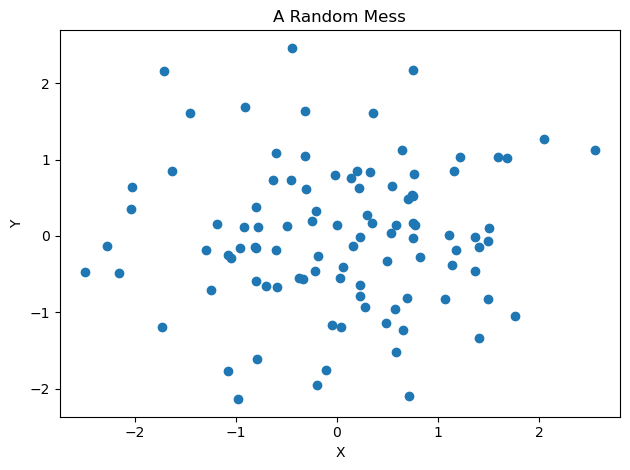

In [31]:
# let's plot create a scatter plot of two continuous, normally distributed variables 
import matplotlib.pyplot as plt

# you can also specify the figure size here too, but don't worry about that,
# just consult a text specific on plotting with this library later on for better plots
fig, ax = plt.subplots()
x = rng.standard_normal(100)
y = rng.standard_normal(100)

ax.set_title("A Random Mess")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# prevent overlap
fig.set_tight_layout(True)

# this also works 
#ax.plot(x, y, 'o')

# plot this mess
ax.scatter(x, y, marker='o');


Of course we can also create plots within plots simply by passing in additional arguments to the `subplots` function.

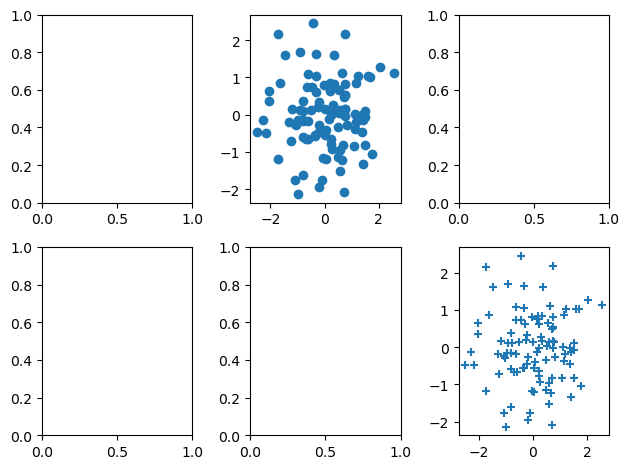

In [32]:
# create a plot where the subplots all share the same x-axis varaible
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_tight_layout(True)

# create a plot in the first row, second column subplot
axes[0,1].scatter(x, y)

# create a plot in the second row, third column subplot
axes[1,2].scatter(x, y, marker='+');

In [33]:
# save the plots to disk (dpi := dots per inch)
fig.savefig('Figure.png', dpi=400)
fig.savefig('Figure.pdf', dpi=200)

Let's take a brief look at something a little more sophisticated.

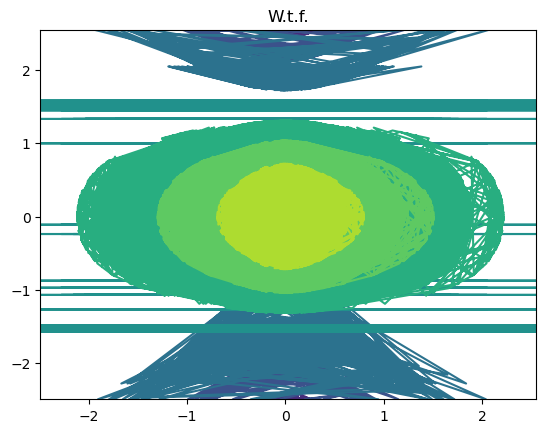

In [35]:
# let's make a contour plot
fig, ax = plt.subplots()

# generate 50 evenly spaced points from -pi to +pi
n = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1/(1+x**2))

ax.set_title("W.t.f.")

ax.contour(x, y, f);

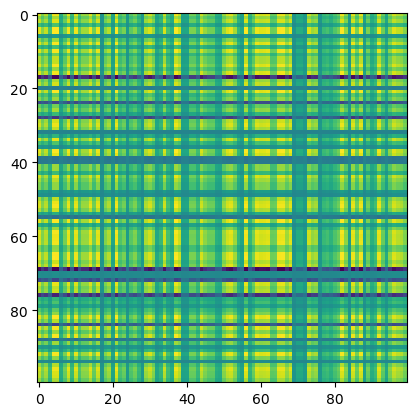

In [36]:
# generate a heatmap?...
fig, ax = plt.subplots()
ax.imshow(f);

There are many other plotting functions and features, as well as other plotting libraries. 
For the purposes of plotting for our basic analysis, the basic features will work but for actual, in-depth analysis, 
there are better tools. Just consult the documentation of the tools as needed. 

--- 

## Sequences and Slice Notation


In [39]:
# generate a sequence of numbers using linspace
seq1 = np.linspace(0, 10, 11)
seq1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [41]:
# generate a sequence of numbers using arange and default step
seq2 = np.arange(0, 10)
seq2


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The rest of this section starts getting into slicing notation, been there done that. Let's move on.

---

## Indexing Data 

In [42]:
# generate 16 integer values and then create a 4x4 matrix with them
A = np.array(np.arange(16)).reshape(4,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [43]:
# element in second row, third column
A[1,2]


6

Indexing a single element is pretty straight-forward. 
We can also select multiple rows at a time by indexing with a list, slicing, etc.

In [44]:
# select multiple rows using a list
A[[1,3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [45]:
# select multiple columns 
A[:, [0,2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [46]:
# select a submatrix but incorrectly...
A[[1,3], [0,2]]

array([ 4, 14])

Let's try something else, we cna use a convenience function `np.ix_()` allows use to extract a submatrix using list
by creating an intermediate mesh object. 

In [49]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [47]:
# go to the second and fourth rows, and give me the first,
# third, and fourth elements
idx = np.ix_([1,3], [0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

We can also subset matrices efficiently using slices.

In [50]:
A[1:4:2, 0:3:2]

array([[ 4,  6],
       [12, 14]])

### Boolean Indexing 

In [52]:
keep_rows = np.zeros(A.shape[0], bool)
keep_rows

array([False, False, False, False])